# Homework 5


### Problem 1 (5% credit). 
Which of the techniques among logistic regression and k-means clustering are unsupervised learning (select all that applied): 
a) both;
b) k-means clustering, but not the logistic regression;
c) logistic regression, but not the k-mean clustering;
d) none of them - both are supervised.

(B) In unsupervised learning, we try to find a hidden structure in unlabeled data, which is the case of k-means. In a logistic regression, we have labeled data, so the learning is supervised.

### Problem 2 (5% credit). 
What is the average silhouette measure used for in the k-means clustering (select all that applies):
a) determining the percentage of correct cluster definitions over the validation set;
b) select the most natural number of clusters for the dataset;
c) determining average size of the clusters;
d) estimating how more similar on average the elements are to their own clusters vs the most similar neighbor clusters;
e) quantifying how distinctive the clusters are.

(B, D) The silhouette measures how well objects fits within its cluster. If the silhouette of one cluster is much narrower than the rest, that might indicate a poor choice of k. By changing the number of clusters for the dataset, the average size of clusters will change, but that's not the purpose of the silhouette measure.

### Problem 3 (10% credit).
What of the below (select all that apply) is true for the binary classification confusion matrix report:
a) it reports sizes of each cluster and number of the clusters;
b) it is a square matrix;
c) it is symmetrical;
d) it has dimensions 2x2;
e) it has dimensions 3x3;
f) it reports the quality of classification fit over the test set;
g) it reports the percentage of correctly classified datapoints over the test set;
h) it reports the percentage of incorrectly classified datapoints over the test set;

(B, D, F, G, H) The confusion matrix is a 2X2 matrix (hence it is a square one). We can see the quality of the classification fit through all the rates calculated with the occurences of TPs, TNs, FPs and FNs; the % of correctly classified datapoints through the accuracy rate; and the % of inccorectly classified datapoints through the misclassification rate

In [3]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import scipy
from scipy import stats
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Populating the interactive namespace from numpy and matplotlib


In [32]:
yt=[1, 1, 0, 0, 1, 0, 1, 0, 1, 1]
yc=[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

### Problem 4 (15% credit)
For the above binary classification (yc - classified values, yt - true ones) compute and visualize the confusion matrix as well as precision, recall and accuracy

In [45]:
yt_array = np.asarray(yt)
yc_array = np.asarray(yc)

#compute TP,FP,FN,TN for the above classification
TP=sum((yc_array==1)&(yt_array==1))
FP=sum((yc_array==1)&(yt_array==0))
FN=sum((yc_array==0)&(yt_array==1))
TN=sum((yc_array==0)&(yt_array==0))

In [46]:
#compute precision, accuracy and recall
ACC=100.0*(TP+TN)/(TP+TN+FP+FN)
Recall=100.0*TP/(TP+FN)
Prec=100.0*TP/(TP+FP)
print('Precision={0}, Accuracy={1}, Recall={2}'.format(Prec,ACC,Recall))

Precision=80.0, Accuracy=70.0, Recall=66.6666666667


In [47]:
data = pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/lab5/H51.csv' , index_col=0 )

### Problem 5a (15% credit). 
For the data above define the clustering into 3 clusters using the best outcome of k-means, being run 100 times

In [48]:
data.head()

,x1,x2
0,3.554228,7.435315
1,3.710305,7.464536
2,2.629357,7.513200
3,5.429580,8.682926
4,2.354003,6.311812


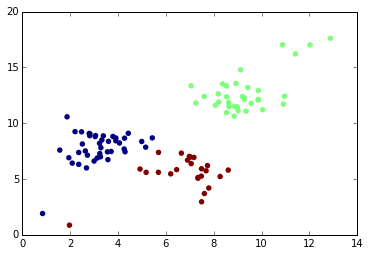

In [49]:
X=np.append(data.x1,data.x2).reshape(2,100).transpose()
# try clustering with k=3
est=KMeans(n_clusters=3,n_init=100)
est.fit(X)
labels=est.labels_
plt.figure(figsize=(6,4))
plt.scatter (data.x1,data.x2,s=30,c=labels.astype(np.float),lw=0)

### Problem 5b (20% credit). 
For the data above perfrom k-means clustering for k=2..10, compute and visualize the average Silhouette score, select and visualize the clustering for that k, which maximizes average Silhouette score

2 clusters: 0.617394854445
3 clusters: 0.602936597638
4 clusters: 0.610330721715
5 clusters: 0.640564751447
6 clusters: 0.543238310637
7 clusters: 0.504150540427
8 clusters: 0.397895960988
9 clusters: 0.399880799241
10 clusters: 0.410430495022
11 clusters: 0.417995519195
Best for 5 clusters: 0.640564751447


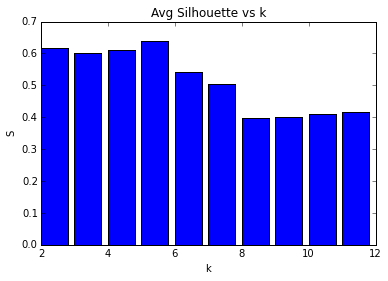

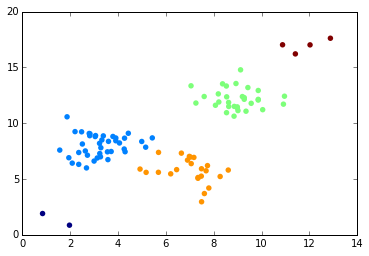

In [50]:
s=[0]*10
for k in range(0,10):
    est=KMeans(n_clusters=k+2,n_init=25)
    est.fit(X)
    s[k]=silhouette_score(X, est.labels_)
    print('{0} clusters: {1}'.format(k+2,s[k]))
k=np.argmax(s)    
est=KMeans(n_clusters=k+2,n_init=100)
est.fit(X)
labels=est.labels_
plt.figure()
plt.bar(range(2,12),s)
plt.xlabel('k')
plt.ylabel('S')
plt.title('Avg Silhouette vs k')
print('Best for {0} clusters: {1}'.format(k+2,silhouette_score(X, labels)))
plt.figure()
plt.scatter (data.x1,data.x2,s=30,c=labels.astype(np.float),lw=0)

In [51]:
data2training = pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/lab5/H52train.csv' , index_col=0 )
data2test = pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/lab5/H52test.csv' , index_col=0 )

### Problem 6a (15% credit) 
For the second dataset above train the logistic regression over the provided training set, report the summary with coeffieints, fit and statistics.

In [52]:
data2training.head()

,x1,x2,y
0,1.103418,5.160703,0
1,0.754804,5.846008,0
2,-1.651331,7.416112,0
3,-2.502233,7.799007,0
4,-0.183246,9.076321,0


Optimization terminated successfully.
         Current function value: 0.200402
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sat, 17 Oct 2015   Pseudo R-squ.:                  0.6982
Time:                        15:34:50   Log-Likelihood:                -20.040
converged:                       True   LL-Null:                       -66.406
                                        LLR p-value:                 7.301e-21
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.5540      0.924     -0.600      0.549        -2.364     1.256
x1             0.7219      0.

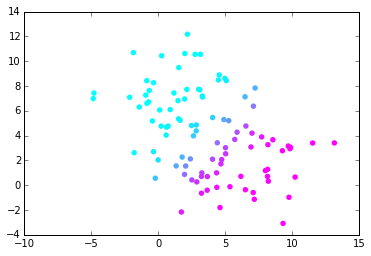

In [53]:
#learn logistic regression over the training sample
logit = smf.logit('y ~ x1 + x2', data = data2training).fit()
#apply to the validation sample
le=logit.predict(data2test)
#visualize the probabilities
plt.figure()
plt.scatter(data2test.x1,data2test.x2,c=le,s=30,lw=0,cmap='cool')
print logit.summary()

### Problem 6b (15% credit). 
For the second dataset and logistic regression above define the true and false positives/negatives over the validation set and visualize the classification through logit vs the true one.

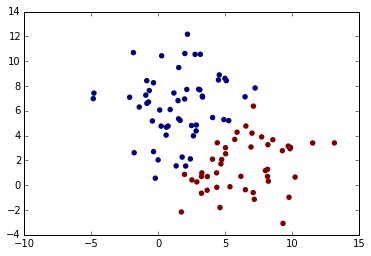

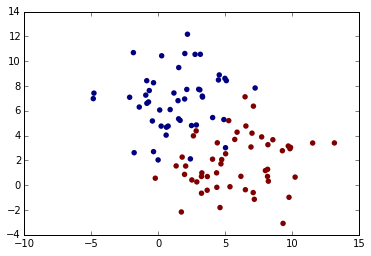

In [54]:
#visualize the classification
le=le>0.5
plt.figure()
plt.scatter(data2test.x1,data2test.x2,c=le,s=30,lw=0)
#visualize the "true" test classification
plt.figure()
plt.scatter(data2test.x1,data2test.x2,c=data2test.y,s=30,lw=0)